# Logistic model 
This model is an application in Python of the model developped in chapter 4.6 of the book : "introduction to statistical learning" (Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani). The aim of the model is to predict whether the day ahead price of electricity will go up or down based on logistic regression predictions. 

## 1. Load packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 2. Prepare data 

In [2]:
#load data
df = pd.read_csv("C:/Users/julie/supervised_project/PS2021.csv", index_col='Unnamed: 0')

#compute returns 
df['preturn'] = df['day_ahead_p'].pct_change()

#create a direction variable : 1 if price went up, 0 if price went down 
df['direction'] = 1 * (df['preturn'] >=0) 

#drop nan
df = df.dropna()

#define X and y 
X = df[[
    'sim_wthr_fcst',
    'sim_wthr_fcst2',
    'day_ahead_p_lag24',
    'day_ahead_p_lag25',
    'day_ahead_p_lag26',
    'day_ahead_p_lag27',
    'day_ahead_p_lag28',
    'day_ahead_p_lag29',
    'day_ahead_p_lag30',
    'day_ahead_p_lag31',
    'day_ahead_p_lag32',
    'day_ahead_p_lag33',
    'day_ahead_p_lag34',
    'day_ahead_p_lag35',
    'day_ahead_p_lag36',
    'day_ahead_p_lag37',
    'day_ahead_p_lag38',
    'day_ahead_p_lag39',
    'day_ahead_p_lag40',
    'day_ahead_p_lag41',
    'day_ahead_p_lag42',
    'day_ahead_p_lag43',
    'day_ahead_p_lag44',
    'day_ahead_p_lag45',
    'day_ahead_p_lag46',
    'day_ahead_p_lag47',
    'load_lag24',
   ]]

y = df['direction']

#split the dataframe betweenn train and test 
X_train = X.iloc[:round(len(df)*0.75)]
y_train = y.iloc[:round(len(df)*0.75)]
X_test = X.iloc[round(len(df)*0.75)+1:]
y_test = y.iloc[round(len(df)*0.75)+1:]

## 3. Estimation 

In [3]:
logreg = LogisticRegression(fit_intercept=True, max_iter=10000) 
logreg.fit(X_train, y_train)
const = logreg.intercept_
coefs = logreg.coef_
prob = logreg.predict_proba(X_test)
pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)

## 4. Evaluation

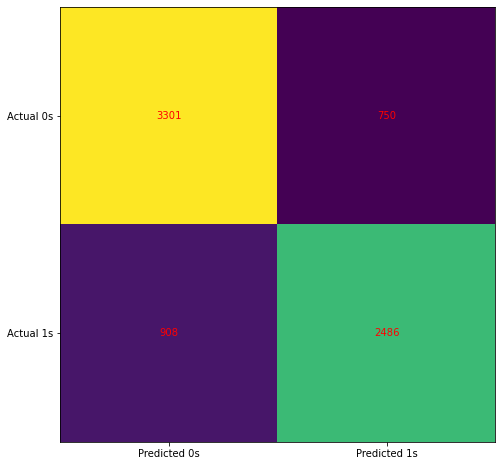

In [4]:
cm = confusion_matrix(y_test, logreg.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.savefig('confusiionM.png')

In [5]:
correct_ups = 2486 / (2486 + 908)
print("Correct ups prediction :",round(correct_ups,4)*100, "%")
correct_downs = 3292 / (3292 + 759)
print("Correct downs prediction :", round(correct_downs,4)*100, "%")

Correct ups prediction : 73.25 %
Correct downs prediction : 81.26 %


Automatically created module for IPython interactive environment


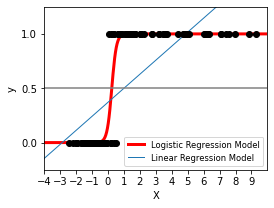

In [6]:
print(__doc__)


# Code source: Gael Varoquaux (https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html)
# License: BSD 3 clause


from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.savefig("logistic_theory.png")

## 